# May 15th

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 2000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-05-15', tweet_mode='extended').items(2000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,@AirdropStario The next good project this is a...
1,Meta token!?!?! No Thanks!!! ...
2,Our eyes on $ATOM... • Price (#USD): $ 41.8800...
3,#love #earnmoney #money #affiliate #affiliatem...
4,#linkedin #twitter #facebook #instagram #bitco...
5,#tumblr #twitter #facebook #instagram #dogecoi...
6,#linkedin #twitter #facebook #instagram #bitco...
7,@AirdropDet Good luck team! The projector has ...
8,"- \nBTC price: $43,156 / £31,557 \n\n23.17 Nak..."
9,@BluesparrowC @elonmusk @BlueSparrowETH The be...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,@AirdropStario The next good project this is a...,@AirdropStario The next good project this is a...
1,Meta token!?!?! No Thanks!!! ...,Meta token!?!?! No Thanks!!! ...
2,Our eyes on $ATOM... • Price (#USD): $ 41.8800...,Our eyes on $ATOM... • Price (): $ 41.88000000...
3,#love #earnmoney #money #affiliate #affiliatem...,bitcoin free shipping on purchas...
4,#linkedin #twitter #facebook #instagram #bitco...,bitcoin Delivers the to you ...


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,@AirdropStario The next good project this is a...,@AirdropStario The next good project this is a...,0.450909,0.447273
1,Meta token!?!?! No Thanks!!! ...,Meta token!?!?! No Thanks!!! ...,0.200000,-0.195312
2,Our eyes on $ATOM... • Price (#USD): $ 41.8800...,Our eyes on $ATOM... • Price (): $ 41.88000000...,0.000000,0.000000
3,#love #earnmoney #money #affiliate #affiliatem...,bitcoin free shipping on purchas...,0.800000,0.400000
4,#linkedin #twitter #facebook #instagram #bitco...,bitcoin Delivers the to you ...,0.000000,0.000000
5,#tumblr #twitter #facebook #instagram #dogecoi...,bitcoin on purchases over $25...,0.000000,0.000000
6,#linkedin #twitter #facebook #instagram #bitco...,bitcoin Become a member,0.000000,0.000000
7,@AirdropDet Good luck team! The projector has ...,@AirdropDet Good luck team! The projector has ...,0.408333,0.458333
8,"- \nBTC price: $43,156 / £31,557 \n\n23.17 Nak...","- BTC price: $43,156 / £31,557 23.17 Naks per ...",0.000000,0.000000
9,@BluesparrowC @elonmusk @BlueSparrowETH The be...,@BluesparrowC @elonmusk @BlueSparrowETH The be...,0.600000,0.783333


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,@AirdropStario The next good project this is a...,@AirdropStario The next good project this is a...,0.450909,0.447273,Positive
1,Meta token!?!?! No Thanks!!! ...,Meta token!?!?! No Thanks!!! ...,0.200000,-0.195312,Negative
2,Our eyes on $ATOM... • Price (#USD): $ 41.8800...,Our eyes on $ATOM... • Price (): $ 41.88000000...,0.000000,0.000000,Neutral
3,#love #earnmoney #money #affiliate #affiliatem...,bitcoin free shipping on purchas...,0.800000,0.400000,Positive
4,#linkedin #twitter #facebook #instagram #bitco...,bitcoin Delivers the to you ...,0.000000,0.000000,Neutral
5,#tumblr #twitter #facebook #instagram #dogecoi...,bitcoin on purchases over $25...,0.000000,0.000000,Neutral
6,#linkedin #twitter #facebook #instagram #bitco...,bitcoin Become a member,0.000000,0.000000,Neutral
7,@AirdropDet Good luck team! The projector has ...,@AirdropDet Good luck team! The projector has ...,0.408333,0.458333,Positive
8,"- \nBTC price: $43,156 / £31,557 \n\n23.17 Nak...","- BTC price: $43,156 / £31,557 23.17 Naks per ...",0.000000,0.000000,Neutral
9,@BluesparrowC @elonmusk @BlueSparrowETH The be...,@BluesparrowC @elonmusk @BlueSparrowETH The be...,0.600000,0.783333,Positive


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


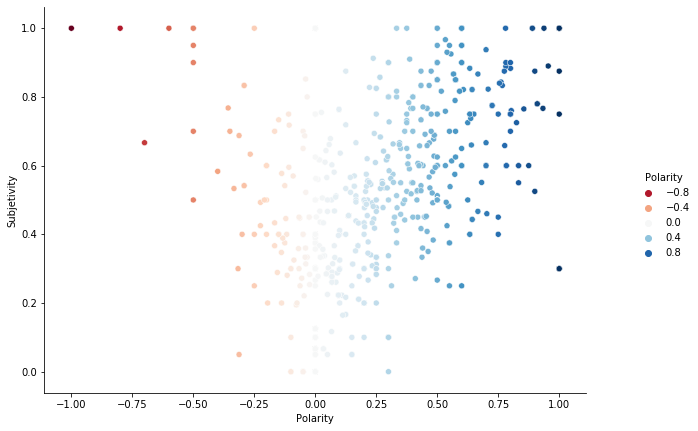

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

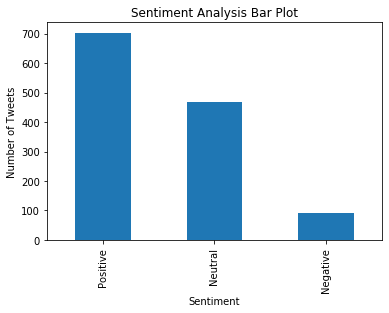

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    703
Neutral     469
Negative     90
Name: Sentiment, dtype: int64

In [19]:
val_count = list(df['Sentiment'].value_counts())
val_count

703

In [ ]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

In [ ]:
dfs = pd.read_csv("f_sentiments.csv")
  
# updating the column value/data
dfs.loc[5, 'Sentiment'] = 'day 6'
dfs.loc[6, 'Positive'] = lst_df[0]
dfs.loc[7, 'Neutral'] = lst_df[1]
dfs.loc[8, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("f_sentiments.csv", index=False)
  
print(dfs)

In [ ]:
# 703 469 90